Lab stuff

In [1]:
import pandas as pd
import numpy as np

auto = pd.read_csv('data/auto.csv')

In [2]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto.dropna(inplace=True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto.loc[lambda df: (df['year'] > 80) & (df['mpg'] > 30),
            ['weight', 'origin']
           ].head()

,weight,origin
343,1755,3
344,1875,1
345,1760,3
346,2065,3
347,1975,3


In [5]:
auto.set_index('name', inplace=True)

In [6]:
auto.loc[lambda df: (df['displacement'] < 300)
                       & (df.index.str.contains('ford')
                       | df.index.str.contains('datsun')),
            ['weight', 'origin']
           ].head()

,weight,origin
name,,
ford maverick,2587,1
datsun pl510,2130,3
datsun pl510,2130,3
ford pinto,2046,1
ford torino 500,3302,1


In [7]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [8]:
auto.cylinders = auto.cylinders.astype('category')
auto.cylinders.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False, categories_dtype=int64)

<Axes: xlabel='cylinders', ylabel='mpg'>

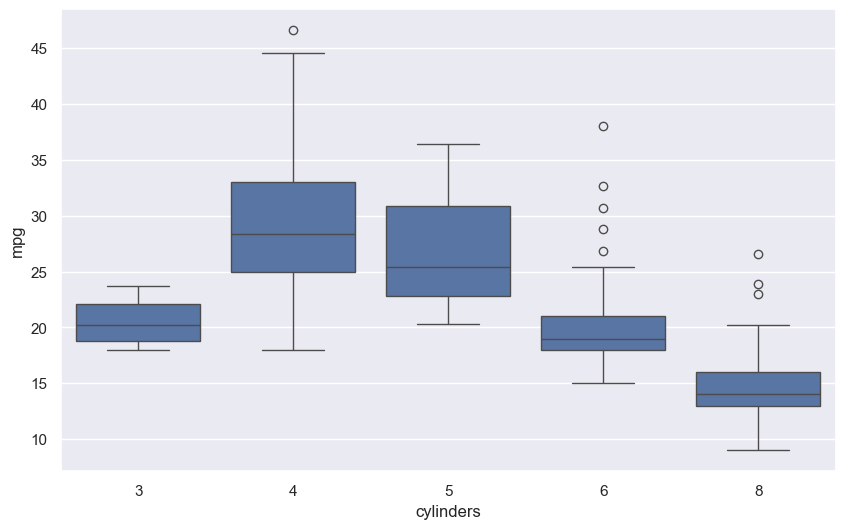

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='cylinders', y='mpg', data=auto, ax=ax)

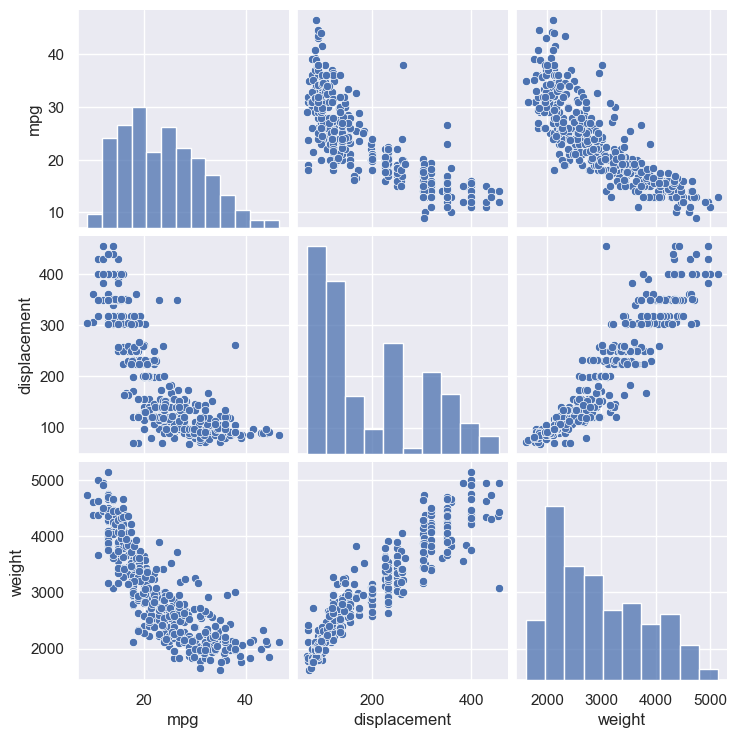

In [10]:
sns.pairplot(auto[['mpg', 'displacement', 'horsepower', 'weight']])

Figure 2.1

In [11]:
advertising = pd.read_csv('data/advertising.csv').drop(columns='Unnamed: 0')
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


TV vs Sales:
m=0.05, b=7.03
Correlation coefficient: 0.78

radio vs Sales:
m=0.20, b=9.31
Correlation coefficient: 0.58

newspaper vs Sales:
m=0.05, b=12.35
Correlation coefficient: 0.23



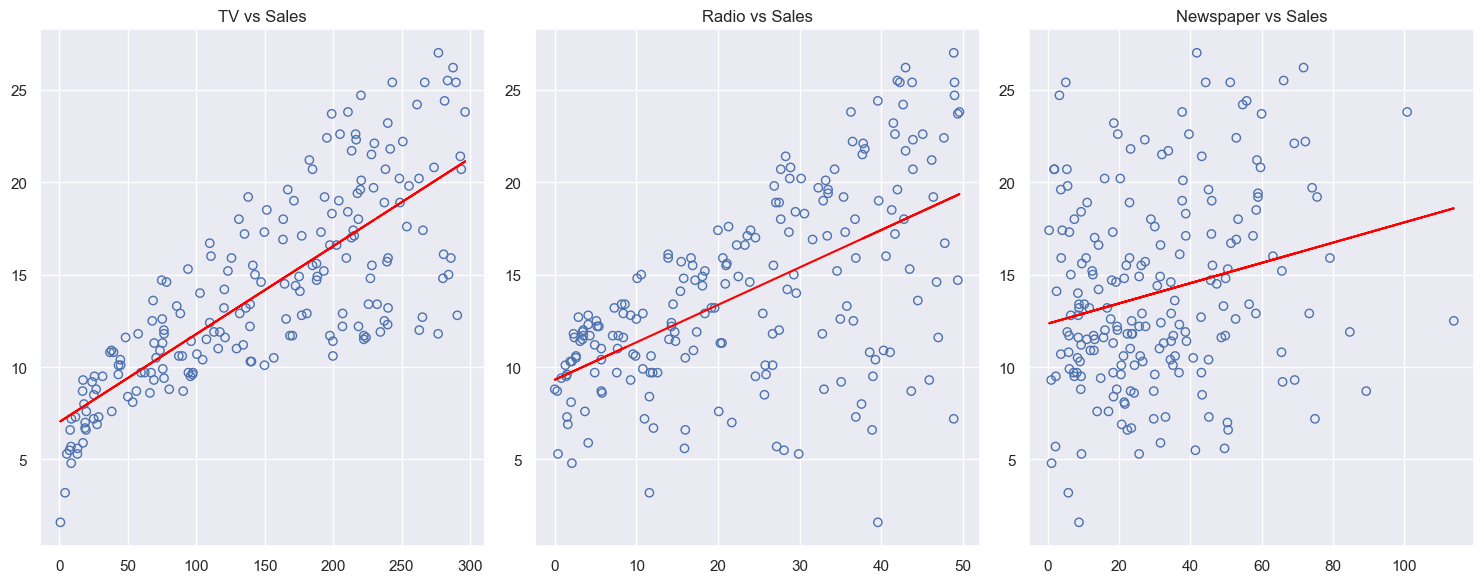

In [12]:
columns = ['TV', 'radio', 'newspaper']
titles = ['TV vs Sales', 'Radio vs Sales', 'Newspaper vs Sales']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

for i, (column, title) in enumerate(zip(columns, titles)):
    # Scatter plot
    ax[i].scatter(advertising[column], advertising['sales'], facecolors='none', edgecolors='b', marker='o')
    ax[i].set_title(title)
    
    # Calculate and plot the OLS line
    m, b = np.polyfit(advertising[column], advertising['sales'], 1)
    print(f'{column} vs Sales:\nm={m:.2f}, b={b:.2f}')
    print(f'Correlation coefficient: {advertising[column].corr(advertising["sales"]):.2f}')
    print()
    ax[i].plot(advertising[column], m*advertising[column] + b, color='red')  # OLS line

plt.tight_layout()
plt.show()


figure 2.3


In [13]:
income = pd.read_csv('data/Income1.csv').drop(columns='Unnamed: 0')
income.head()

,Education,Income
0,10.000000,26.658839
1,10.401338,27.306435
2,10.842809,22.132410
3,11.244147,21.169841
4,11.645485,15.192634


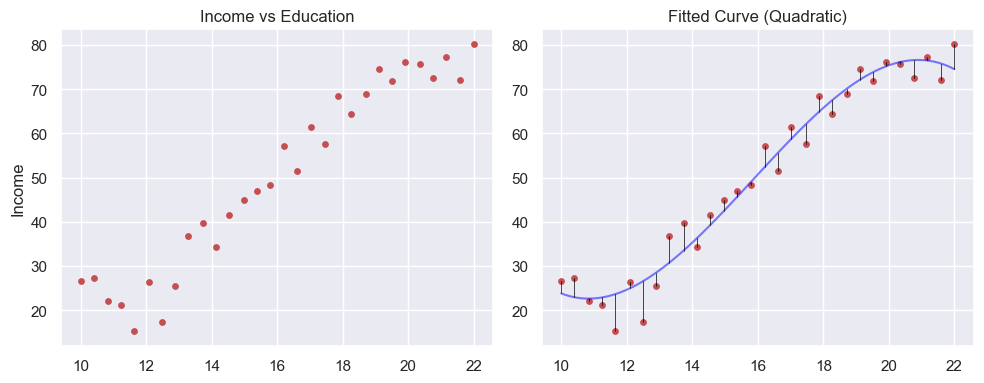

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

x = income['Education']
y = income['Income']

# Scatter plot on both subplots
ax[0].scatter(x, y, c ='r', marker='o', s = 15)
ax[1].scatter(x, y, c='r', marker='o',s = 15)
ax[0].set_title('Income vs Education')

# Fit a polynomial of degree 2 (quadratic curve)
coefficients = np.polyfit(x, y, 3
                          )
# Use the coefficients to create a polynomial function
poly_func = np.poly1d(coefficients)

# Generate a sequence of x values for plotting the fitted curve
x_line = np.linspace(x.min(), x.max(), 100)
# Calculate the y values of the fitted curve
y_line = poly_func(x_line)

# Plot the fitted curve on the second subplot
ax[1].plot(x_line, y_line, color='blue', alpha=0.5)

# For displaying lines to show the distance of the point to the line (residuals) on the first subplot
y_fitted = poly_func(x)
for (xi, yi, y_fitted_i) in zip(x, y, y_fitted):
    ax[1].plot([xi, xi], [yi, y_fitted_i], color="black", linestyle='-', linewidth=0.5)

ax[1].set_title('Fitted Curve (Quadratic)')

#make y axis called income
ax[0].set_ylabel('Income')


plt.tight_layout()
plt.show()


In [15]:
income2 = pd.read_csv('data/Income2.csv').drop(columns='Unnamed: 0')
income2.head()

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922


2.4

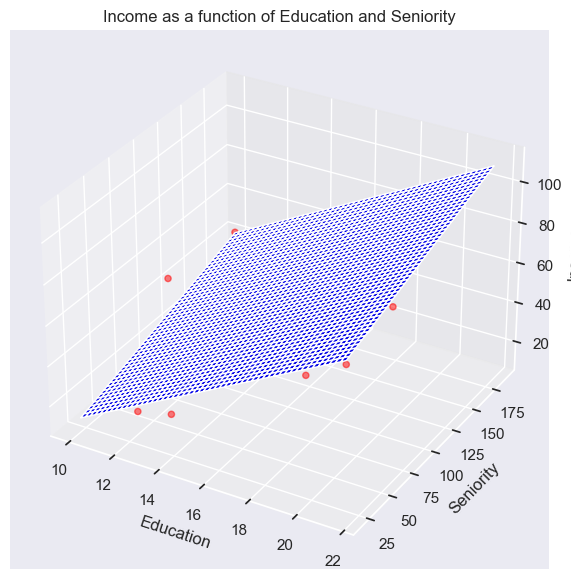

In [40]:
from sklearn.linear_model import LinearRegression


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
X = income2[['Education', 'Seniority']]
y = income2['Income']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions for surface plot
x_surf, y_surf = np.meshgrid(np.linspace(X['Education'].min(), X['Education'].max(), 1000), 
                             np.linspace(X['Seniority'].min(), X['Seniority'].max(), 1000))

onlyX = pd.DataFrame({'Education': x_surf.ravel(), 'Seniority': y_surf.ravel()})
fittedY = model.predict(onlyX)

# Reshaping for the plot
fittedY = fittedY.reshape(x_surf.shape)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Education'], X['Seniority'], y, color='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY, color='blue')
ax.set_xlabel('Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')
ax.set_title('Income as a function of Education and Seniority')

plt.show()
